In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

plt.style.use('fivethirtyeight')

%matplotlib inline

os.chdir(r"C:\Users\sriva\OneDrive\Documents\Spring'2022\Python")

os.getcwd()

"C:\\Users\\sriva\\OneDrive\\Documents\\Spring'2022\\Python"

In [3]:
college_data_original = pd.read_csv('College_Data.csv')
college_data = college_data_original.copy()
college_data.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
#Information about the datatype of the columns and count of non-null rows for each column
#Analyze datatype to reduce memory usage
college_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [5]:
#Renaming columns
new_column_names = {'Unnamed: 0':'college_name', 'Private':'is_private', 'Top10perc':'PctTop10HS','Top25perc':'PctTop25HS','Apps':'no_of_applications', 'Accept':'no_of_apps_accepted', 'Enroll':'no_of_enrolled', 'F.Undergrad': 'no_of_FT', 'P.Undergrad': 'no_of_PT', 'Outstate':'outstate_tuition', 'Room.Board':'room_board_cost', 'Books':'books_cost', 'Personal': 'personal_spending', 'PhD': 'pct_phd_faculty', 'Terminal':'pct_termianl_faculty','S.F.Ratio':'sf_ratio', 'perc.alumni':'pct_alumni_donors','Expend':'exp_per_student', 'Grad.Rate':'grad_rate'} 

college_data.rename(columns=new_column_names, inplace=True)
college_data.head()

,college_name,is_private,no_of_applications,no_of_apps_accepted,no_of_enrolled,PctTop10HS,PctTop25HS,no_of_FT,no_of_PT,outstate_tuition,room_board_cost,books_cost,personal_spending,pct_phd_faculty,pct_termianl_faculty,sf_ratio,pct_alumni_donors,exp_per_student,grad_rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [6]:
college_data['PctTop10HS'] = college_data['PctTop10HS'].astype('int16')
college_data['PctTop25HS'] = college_data['PctTop25HS'].astype('int16')
college_data['pct_phd_faculty'] = college_data['pct_phd_faculty'].astype('int16')
college_data['pct_termianl_faculty'] = college_data['pct_termianl_faculty'].astype('int16')
college_data['pct_alumni_donors'] = college_data['pct_alumni_donors'].astype('int16')
college_data['grad_rate'] = college_data['grad_rate'].astype('int16')

In [7]:
#Identifying numeric and non-numeric columns
cat_df = college_data.select_dtypes(include=['object'])
num_df = college_data.select_dtypes(exclude=['object'])

numeric_columns = []
categ_columns = []
def segregateBasedOnColumnTypes(non_numeric_df, numeric_df):
    for col in non_numeric_df:
        categ_columns.append(f"{col}")
    for col in numeric_df:
        numeric_columns.append(f"{col}")

        
segregateBasedOnColumnTypes(cat_df, num_df)

In [8]:
#Checking if college_name has any duplicates
college_data['college_name'].duplicated().any()

#Setting college_name as index as it is unique
college_data = college_data.set_index("college_name")
college_data.head()

,is_private,no_of_applications,no_of_apps_accepted,no_of_enrolled,PctTop10HS,PctTop25HS,no_of_FT,no_of_PT,outstate_tuition,room_board_cost,books_cost,personal_spending,pct_phd_faculty,pct_termianl_faculty,sf_ratio,pct_alumni_donors,exp_per_student,grad_rate
college_name,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [9]:
#Check for presence of missing or null values
print(college_data.isnull().any())

is_private              False
no_of_applications      False
no_of_apps_accepted     False
no_of_enrolled          False
PctTop10HS              False
PctTop25HS              False
no_of_FT                False
no_of_PT                False
outstate_tuition        False
room_board_cost         False
books_cost              False
personal_spending       False
pct_phd_faculty         False
pct_termianl_faculty    False
sf_ratio                False
pct_alumni_donors       False
exp_per_student         False
grad_rate               False
dtype: bool


In [10]:
#Check if there are duplicate rows in the dataset
college_data.duplicated().any()

False

In [11]:
# Analyze descriptive statistics of dataset
college_data.describe().round(decimals=2)

,no_of_applications,no_of_apps_accepted,no_of_enrolled,PctTop10HS,PctTop25HS,no_of_FT,no_of_PT,outstate_tuition,room_board_cost,books_cost,personal_spending,pct_phd_faculty,pct_termianl_faculty,sf_ratio,pct_alumni_donors,exp_per_student,grad_rate
count,777.00,777.00,777.00,777.00,777.0,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00
mean,3001.64,2018.80,779.97,27.56,55.8,3699.91,855.30,10440.67,4357.53,549.38,1340.64,72.66,79.70,14.09,22.74,9660.17,65.46
std,3870.20,2451.11,929.18,17.64,19.8,4850.42,1522.43,4023.02,1096.70,165.11,677.07,16.33,14.72,3.96,12.39,5221.77,17.18
min,81.00,72.00,35.00,1.00,9.0,139.00,1.00,2340.00,1780.00,96.00,250.00,8.00,24.00,2.50,0.00,3186.00,10.00
25%,776.00,604.00,242.00,15.00,41.0,992.00,95.00,7320.00,3597.00,470.00,850.00,62.00,71.00,11.50,13.00,6751.00,53.00
50%,1558.00,1110.00,434.00,23.00,54.0,1707.00,353.00,9990.00,4200.00,500.00,1200.00,75.00,82.00,13.60,21.00,8377.00,65.00
75%,3624.00,2424.00,902.00,35.00,69.0,4005.00,967.00,12925.00,5050.00,600.00,1700.00,85.00,92.00,16.50,31.00,10830.00,78.00
max,48094.00,26330.00,6392.00,96.00,100.0,31643.00,21836.00,21700.00,8124.00,2340.00,6800.00,103.00,100.00,39.80,64.00,56233.00,118.00


In [12]:
## Removing erraneous data

# Count the number of rows which have graduation rate greater than 100%
print('No. of rows with erraneous graduation rate: ' + str(len(college_data[college_data['grad_rate'] > 100])))
# Retain only rows without erranous data
college_data = college_data[college_data['grad_rate'] < 100]

# Count the number of rows which have percentage of PHD faculty greater than 100%
print('No. of rows with erraneous percentage of PHD faculty: ' + str(len(college_data[college_data['pct_phd_faculty'] > 100])))
# Retain only rows without erranous data
college_data = college_data[college_data['pct_phd_faculty'] < 100]

No. of rows with erraneous graduation rate: 1
No. of rows with erraneous percentage of PHD faculty: 1


<AxesSubplot:>

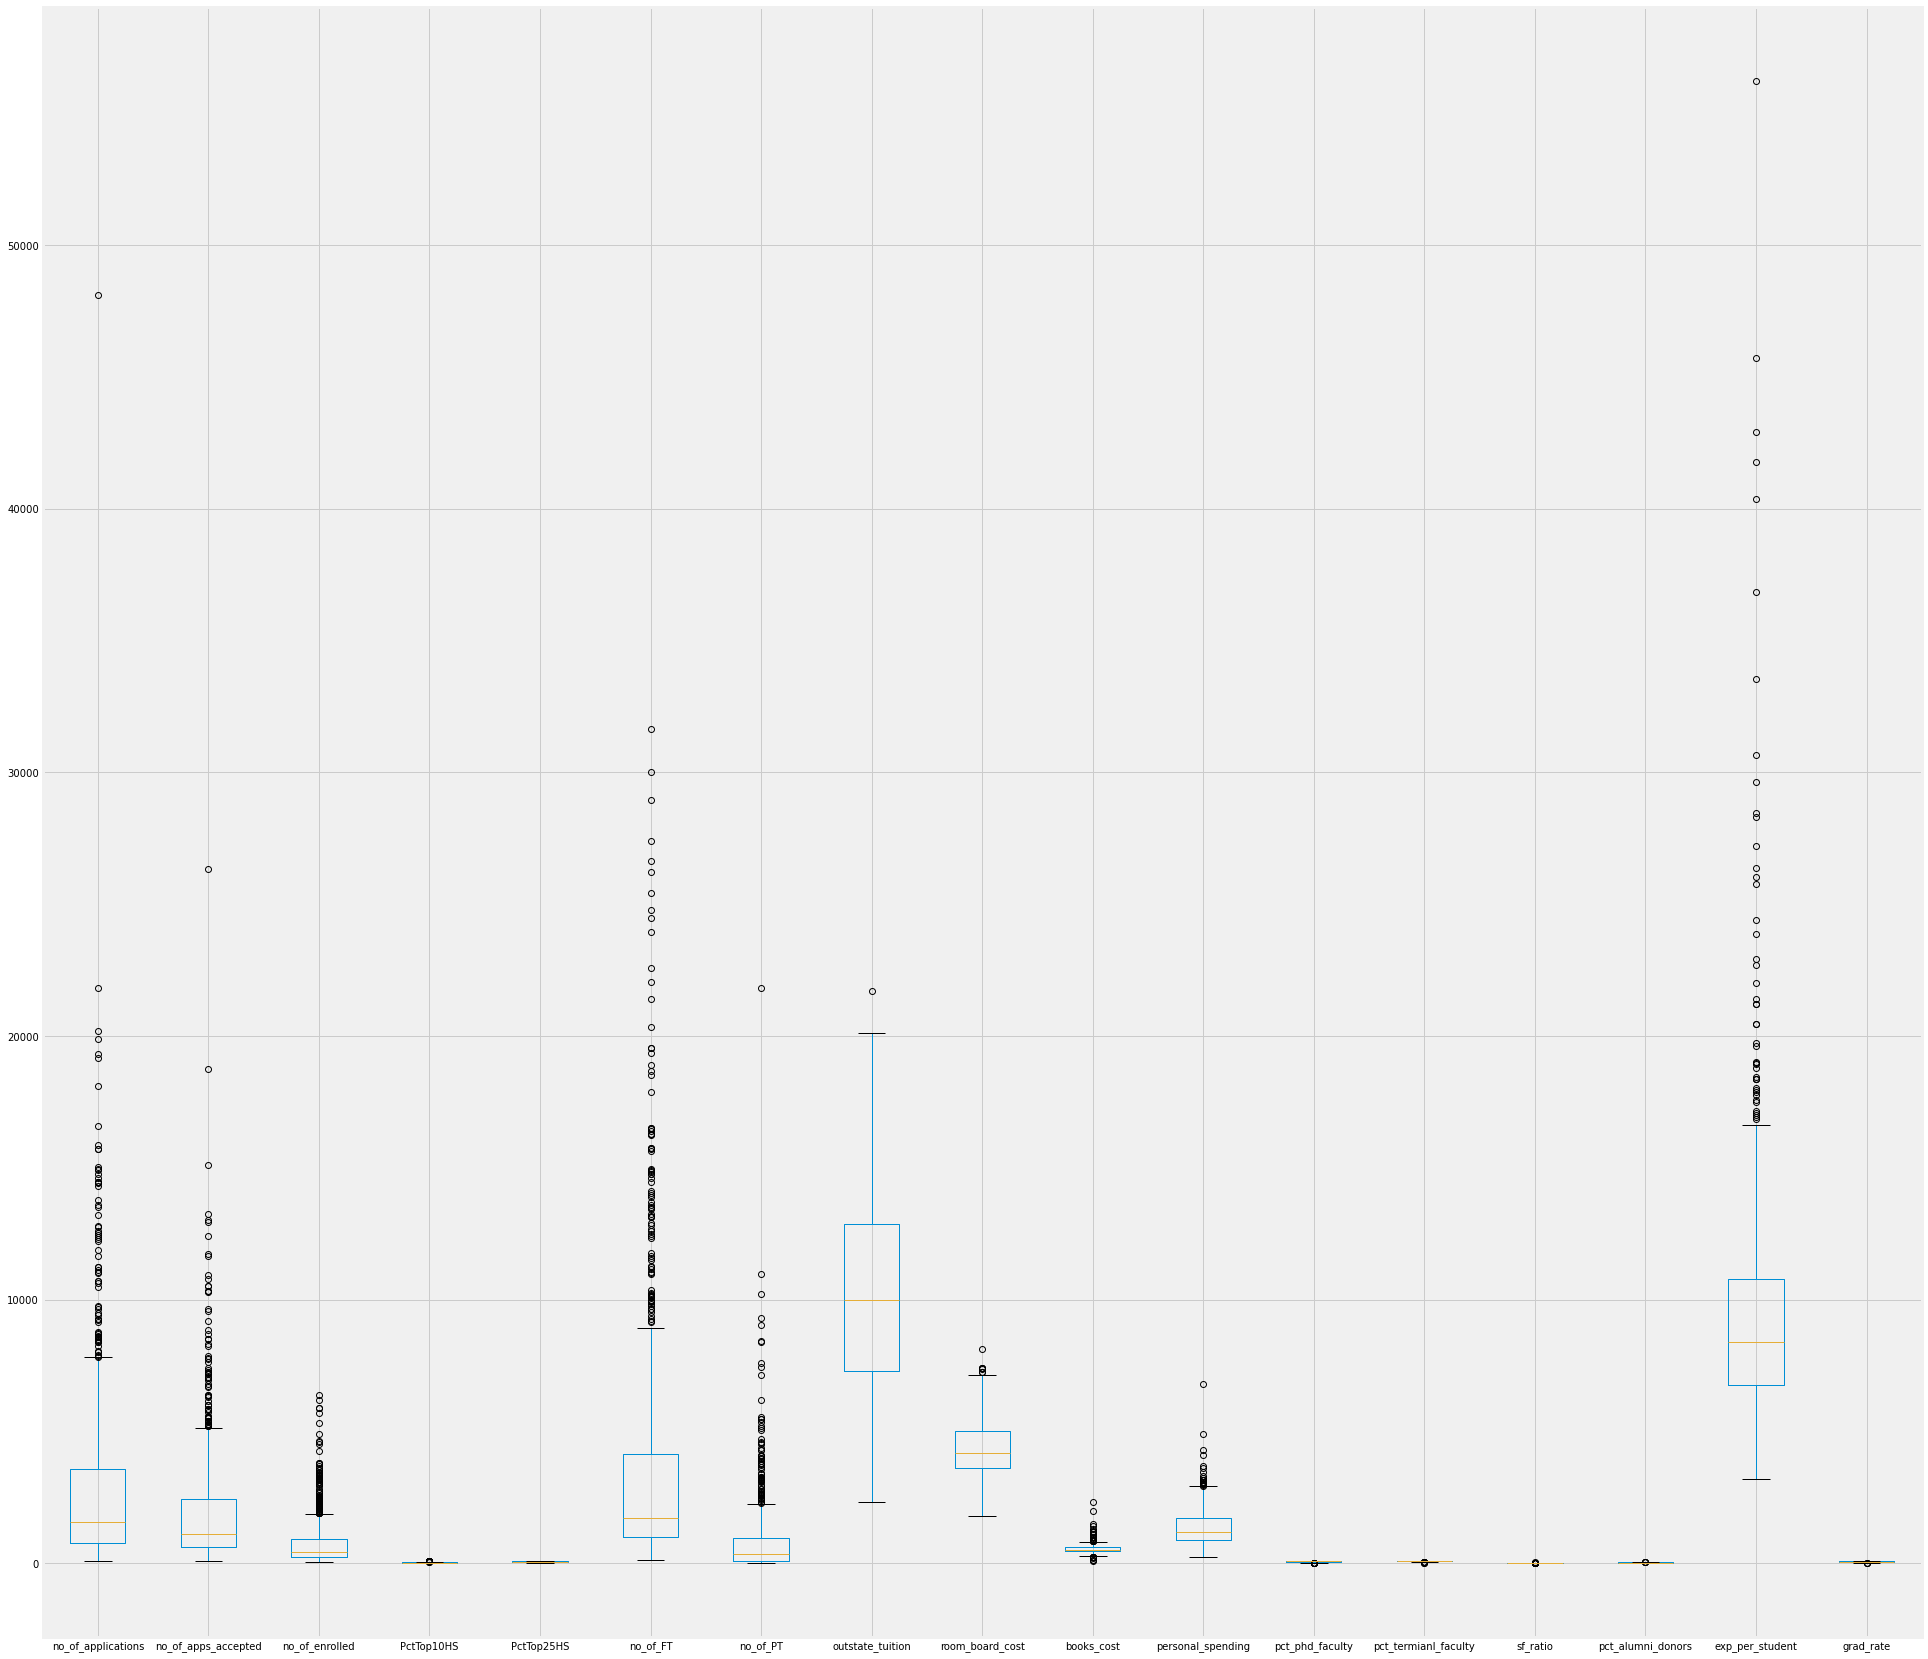

In [13]:
# Outlier detection using box plots
plt.figure(figsize=(30, 30))
college_data.boxplot(numeric_columns)


In [14]:
# calculate Q1 and Q3
Q1 = college_data.quantile(0.25)
Q3 = college_data.quantile(0.75)

# calculate the IQR
IQR = Q3 - Q1

# filter the dataset with the IQR
IQR_outliers = college_data[((college_data < (Q1 - 1.5 * IQR)) |(college_data > (Q3 + 1.5 * IQR))).any(axis=1)]
IQR_outliers

<ipython-input-14-c46559346566>:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  IQR_outliers = college_data[((college_data < (Q1 - 1.5 * IQR)) |(college_data > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-14-c46559346566>:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  IQR_outliers = college_data[((college_data < (Q1 - 1.5 * IQR)) |(college_data > (Q3 + 1.5 * IQR))).any(axis=1)]


,is_private,no_of_applications,no_of_apps_accepted,no_of_enrolled,PctTop10HS,PctTop25HS,no_of_FT,no_of_PT,outstate_tuition,room_board_cost,books_cost,personal_spending,pct_phd_faculty,pct_termianl_faculty,sf_ratio,pct_alumni_donors,exp_per_student,grad_rate
college_name,,,,,,,,,,,,,,,,,,
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Andrews University,Yes,1130,704,322,14,23,1586,326,9996,3090,900,1320,62,66,11.5,18,10908,46
Antioch University,Yes,713,661,252,25,44,712,23,15476,3336,400,1100,69,82,11.3,35,42926,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Michigan University,No,9167,7191,2738,24,53,15739,4278,6940,4100,500,1700,80,84,24.7,11,5983,55
Westminster College PA,Yes,1738,1373,417,21,55,1335,30,18460,5970,700,850,92,96,13.2,41,22704,71
William Woods University,Yes,469,435,227,17,39,851,120,10535,4365,550,3700,39,66,12.9,16,7438,52


In [15]:
# Percent of outliers in the dataset
print('Percentage of outliers in the datase = ' + str(round((len(IQR_outliers)/ len(college_data))*100, 2)) + '%')

Percentage of outliers in the datase = 30.01%


<AxesSubplot:>

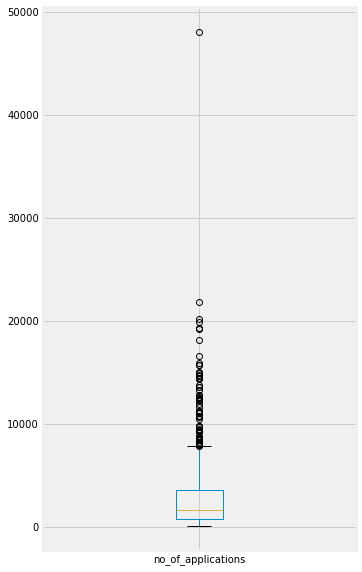

In [16]:
# Outlier detection using box plots
plt.figure(figsize=(5, 10))
college_data.boxplot(column = 'no_of_applications')

<AxesSubplot:>

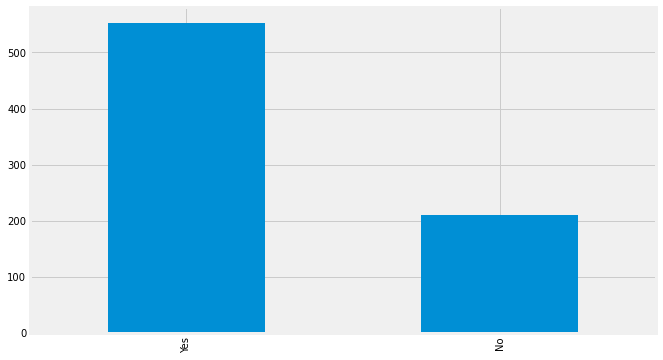

In [17]:
#Distribution of categorical variable is_private
plt.figure(figsize=(10, 6))
college_data['is_private'].value_counts().plot.bar()

In [18]:
college_data.columns

Index(['is_private', 'no_of_applications', 'no_of_apps_accepted',
       'no_of_enrolled', 'PctTop10HS', 'PctTop25HS', 'no_of_FT', 'no_of_PT',
       'outstate_tuition', 'room_board_cost', 'books_cost',
       'personal_spending', 'pct_phd_faculty', 'pct_termianl_faculty',
       'sf_ratio', 'pct_alumni_donors', 'exp_per_student', 'grad_rate'],
      dtype='object')

In [19]:
## Aggregation of columns

# Calculate total miscellaneous cost for each college based on the cost variables such as room_board_cost, books_cost and personal_spending
#     out-of-state tuition is not included in the cost calculation as in-state-tuition is not available in the dataset


def getTotalMiscCost(df):
    overallCost = []
    
    #For each column, get the college's overall costs
    for index, row in df.iterrows():
        overallCost.append(row['room_board_cost'] + row['books_cost'] 
        + row['personal_spending']) 
        
    return overallCost
        
college_data["total_misc_cost"] = getTotalMiscCost(college_data) #Fill overall costs
college_data.head() #Take a peek at the dataset

,is_private,no_of_applications,no_of_apps_accepted,no_of_enrolled,PctTop10HS,PctTop25HS,no_of_FT,no_of_PT,outstate_tuition,room_board_cost,books_cost,personal_spending,pct_phd_faculty,pct_termianl_faculty,sf_ratio,pct_alumni_donors,exp_per_student,grad_rate,total_misc_cost
college_name,,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,5950
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,8700
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,5315
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,6775
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,6420


In [20]:
## Creating new columns based on existing columns

# Calculate acceptance rate of each college based on the number of applicants and the number of applications accepted by the college
college_data["accept_rate"] =  round((college_data["no_of_apps_accepted"] / college_data["no_of_applications"])*100, 2)
college_data.head() #Take a peek at the dataset

,is_private,no_of_applications,no_of_apps_accepted,no_of_enrolled,PctTop10HS,PctTop25HS,no_of_FT,no_of_PT,outstate_tuition,room_board_cost,books_cost,personal_spending,pct_phd_faculty,pct_termianl_faculty,sf_ratio,pct_alumni_donors,exp_per_student,grad_rate,total_misc_cost,accept_rate
college_name,,,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,5950,74.22
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,8700,88.01
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,5315,76.82
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,6775,83.69
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,6420,75.65


In [70]:
#Data Normalization

#Copying the dataframe to a new variable
df = college_data

#Removing categorical variable since it can't be normalized
df = df.drop(['is_private'],axis=1)

#Creating a normalized dataframe where each value is substracted by mean of its column and divided by standard deviation of its column
#Note: This dataframe will only be used for Machine Learning Model and not for descriptive statistics
normalized_df=(df-df.min())/(df.max()-df.min())
normalized_df.head()

,no_of_applications,no_of_apps_accepted,no_of_enrolled,PctTop10HS,PctTop25HS,no_of_FT,no_of_PT,outstate_tuition,room_board_cost,books_cost,personal_spending,pct_phd_faculty,pct_termianl_faculty,sf_ratio,pct_alumni_donors,exp_per_student,grad_rate,total_misc_cost,accept_rate
college_name,,,,,,,,,,,,,,,,,,,
Abilene Christian University,0.032887,0.044177,0.107913,0.231579,0.472527,0.087164,0.024548,0.263430,0.239596,0.157754,0.297710,0.681319,0.710526,0.418231,0.187500,0.072671,0.561798,0.279910,0.695092
Adelphi University,0.043842,0.070531,0.075035,0.157895,0.219780,0.080752,0.056148,0.513430,0.736129,0.291444,0.190840,0.230769,0.078947,0.260054,0.250000,0.138387,0.516854,0.590293,0.858190
Adrian College,0.028055,0.039036,0.047349,0.221053,0.450549,0.028473,0.004488,0.460227,0.310530,0.135472,0.139695,0.494505,0.552632,0.278820,0.468750,0.104605,0.494382,0.208239,0.725843
Agnes Scott College,0.006998,0.010549,0.016045,0.621053,0.879121,0.011776,0.002839,0.548554,0.578499,0.157754,0.095420,0.923077,0.960526,0.139410,0.578125,0.298415,0.550562,0.373025,0.807096
Alaska Pacific University,0.002333,0.002818,0.003146,0.157895,0.384615,0.003492,0.039753,0.269628,0.368852,0.313725,0.190840,0.747253,0.631579,0.252011,0.031250,0.145833,0.056180,0.332957,0.712005


In [21]:
## Data reduction

from sklearn.decomposition import PCA as pca
from sklearn import preprocessing

#Create dataframe wiht only numerical columns
reduc_data_pca = college_data[numeric_columns]
reduc_data_pca

#Scaling data
scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(reduc_data_pca)
pca_result = pca(n_components=17).fit(scaled_data)

#Obtain eigenvalues
pca_result.explained_variance_

#Components from the PCA
pca_result.components_.T * np.sqrt(pca_result.explained_variance_)

array([[ 6.00948957e-01,  6.86258632e-01, -4.79981608e-02,
         2.85623624e-01, -3.49225654e-02, -2.47540136e-02,
        -6.77764873e-02, -2.40606842e-02, -7.04484858e-02,
         3.30309254e-02,  1.24036494e-02,  7.14073876e-03,
         2.42983442e-01,  3.76535041e-02,  3.84991149e-02,
         8.17820367e-02,  5.86863605e-02],
       [ 5.17902879e-01,  7.68303402e-01, -9.05521999e-02,
         2.81519182e-01,  9.22186612e-03, -1.17654031e-02,
        -1.71748622e-02, -2.08253099e-02, -1.26143182e-01,
         3.51972637e-02, -2.82706642e-02, -6.65280254e-02,
         1.19809868e-01,  1.72947854e-02, -4.17249568e-02,
        -9.01971711e-02, -8.65318750e-02],
       [ 4.42236203e-01,  8.38887716e-01, -7.53763541e-02,
         1.60123094e-01, -8.14082446e-02, -4.15990802e-02,
         3.81772655e-02,  4.80495681e-02, -8.65043959e-02,
         2.36962055e-02, -3.81670865e-02,  3.83384993e-03,
        -1.81656198e-01, -3.78405713e-02,  8.71320853e-03,
        -8.53387112e-02,  8.5

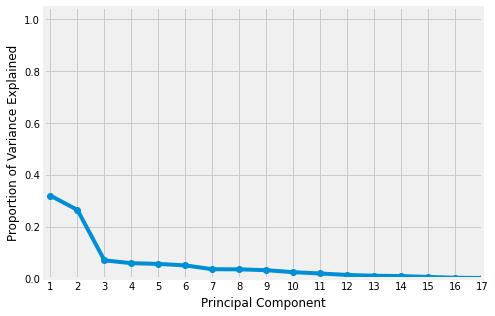

In [22]:
# Creating scree plots
# Run this group of code together by highlighting it
# all and then running it
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17], pca_result.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Variance Explained') 
plt.xlabel('Principal Component') 
plt.xlim(0.75,4.25) 
plt.ylim(0,1.05) 
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])

plt.show()

In [28]:
#Exporting the cleaned dataframe to a csv file
#This file is used in RStudio to create some visualizations
college_data.to_csv("college_data_n.csv")